In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


filename = r'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'
df = pd.read_csv(filename)
#two-way ANOVA
model = ols('expr ~ C(age) + C(dose) + C(age):C(dose)', data = df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age),197.452754,1.0,7.449841,0.008313
C(dose),16.912241,1.0,0.638094,0.427552
C(age):C(dose),0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


In [2]:
import numpy as np


groups = df.groupby(by=['age', 'dose'])['expr']
mean = groups.mean()
std = groups.std()
n = groups.apply(len)
t = 2.131

# Ошибка на графике
std_gr = std * t / np.sqrt(n)

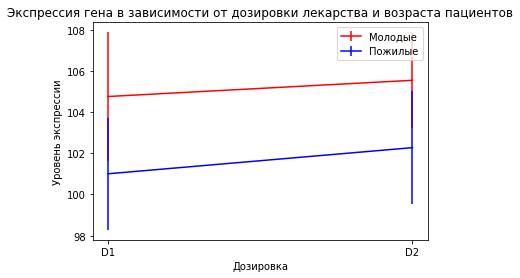

In [3]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.errorbar(x=[mean.index[0][1], mean.index[1][1]], y=mean[1], yerr=std_gr[1], label='Молодые', color='red')
ax.errorbar(x=[mean.index[2][1], mean.index[3][1]], y=mean[2], yerr=std_gr[2], label='Пожилые', color='blue')
ax.set_ylabel('Уровень экспрессии')
ax.set_xlabel('Дозировка')
ax.set_title('Экспрессия гена в зависимости от дозировки лекарства и возраста пациентов')
ax.legend()